### Revenue Forecasting

In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Utility libraries
import datetime
import numpy as np
from sklearn.metrics import mean_squared_error

# ARIMA libraries
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

#### Whole Revenue

In [6]:
df = pd.read_csv("V:\Forecasting PMX\Dati\CSV database PMX final.csv",delimiter=',',encoding='utf-8', na_values=['', 'NaN', 'nan'])


In [7]:
df.head() #df

,Cliente,Mese,Billing
0,3BEE,01/07/2022,9.412
1,AB INBEV,01/02/2023,238.337
2,AB INBEV,01/02/2024,335.421
3,AB INBEV,01/03/2023,484.813
4,AB INBEV,01/03/2024,427.166


In [8]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Cliente, Mese, Billing]
Index: []


In [9]:
# Visualizza le informazioni di base sul DataFrame
print(df.info())

# Visualizza le statistiche descrittive del DataFrame
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Cliente  3134 non-null   object
 1   Mese     3134 non-null   object
 2   Billing  3134 non-null   object
dtypes: object(3)
memory usage: 73.6+ KB
None
       Cliente        Mese Billing
count     3134        3134    3134
unique     184          36    3007
top     ESSITY  01/11/2023   1.000
freq        36         107       8


In [10]:
df.dtypes

Cliente    object
Mese       object
Billing    object
dtype: object

In [11]:
df = df.sort_index()


In [12]:
# Visualizza le prime righe del dataset
print("Prime 15 righe del dataset originale:")
print(df.head(3135))

# Informazioni sul dataset
print("\nInformazioni sul dataset originale:")
print(df.info())

# Controlla se ci sono valori NaN
nan_values = df.isna().sum()
print("\nNumero di valori NaN per colonna nel dataset originale:")
print(nan_values)

Prime 15 righe del dataset originale:
                                       Cliente        Mese     Billing
0                                         3BEE  01/07/2022       9.412
1                                     AB INBEV  01/02/2023     238.337
2                                     AB INBEV  01/02/2024     335.421
3                                     AB INBEV  01/03/2023     484.813
4                                     AB INBEV  01/03/2024     427.166
5                                     AB INBEV  01/04/2023     855.423
6                                     AB INBEV  01/04/2024     639.367
7                                     AB INBEV  01/05/2023     928.273
8                                     AB INBEV  01/05/2024     762.774
9                                     AB INBEV  01/06/2023     781.605
10                                    AB INBEV  01/06/2024     849.611
11                                    AB INBEV  01/07/2022   1.015.707
12                                    A

In [13]:
# Funzione per rimuovere eventuali spazi extra e caratteri speciali dai dati
def clean_data(x):
    if isinstance(x, str):
        x = x.strip()  # Rimuovi spazi extra
        x = x.replace('�', '')  # Rimuovi caratteri speciali
        x = x.replace('.', '').replace(',', '')  # Rimuovi punti e virgole dai numeri se necessario
        return x if x else None  # Sostituisci stringhe vuote con None (che pandas interpreta come NaN)
    return x

# Applica la funzione di pulizia ai dati
df_cleaned = df.applymap(clean_data)

# Verifica la presenza di valori NaN dopo la pulizia
nan_values_cleaned = df_cleaned.isna().sum()
print("\nNumero di valori NaN per colonna nel dataset pulito:")
print(nan_values_cleaned)

# Visualizza le prime righe del dataset pulito
print("\nPrime 15 righe del dataset pulito:")
print(df_cleaned.head(3135))

# Informazioni sul dataset pulito
print("\nInformazioni sul dataset pulito:")
print(df_cleaned.info())


Numero di valori NaN per colonna nel dataset pulito:
Cliente    0
Mese       0
Billing    0
dtype: int64

Prime 15 righe del dataset pulito:
                                       Cliente        Mese   Billing
0                                         3BEE  01/07/2022      9412
1                                     AB INBEV  01/02/2023    238337
2                                     AB INBEV  01/02/2024    335421
3                                     AB INBEV  01/03/2023    484813
4                                     AB INBEV  01/03/2024    427166
5                                     AB INBEV  01/04/2023    855423
6                                     AB INBEV  01/04/2024    639367
7                                     AB INBEV  01/05/2023    928273
8                                     AB INBEV  01/05/2024    762774
9                                     AB INBEV  01/06/2023    781605
10                                    AB INBEV  01/06/2024    849611
11                            

In [14]:
df = df[df['Cliente'] == "STELLANTIS"]

In [15]:
df.head()

,Cliente,Mese,Billing
2885,STELLANTIS,01/01/2022,14.248.420
2886,STELLANTIS,01/01/2023,18.173.817
2887,STELLANTIS,01/01/2024,23.025.556
2888,STELLANTIS,01/02/2022,19.752.377
2889,STELLANTIS,01/02/2023,17.247.252


In [16]:
df.dtypes

Cliente    object
Mese       object
Billing    object
dtype: object

In [17]:
# Applica la funzione di pulizia ai dati
df_cleaned = df.applymap(clean_data)

# Converti la colonna Billing in tipo numerico
df_cleaned['Billing'] = pd.to_numeric(df_cleaned['Billing'], errors='coerce')

# Formattazione finale della colonna Billing con il punto come separatore delle migliaia per visualizzazione
def format_billing_for_display(value):
    if pd.notnull(value):
        return f"{value:,.0f}".replace(",", ".")
    return value

# Applica la funzione di formattazione alla colonna Billing per visualizzazione
df_cleaned['Billing_Display'] = df_cleaned['Billing'].apply(format_billing_for_display)

# Visualizza le prime righe del dataset pulito e formattato
print("\nPrime 15 righe del dataset pulito e formattato:")
print(df_cleaned.head(3135))

# Controlla i tipi di dati dopo la conversione
print("\nTipi di dati dopo la conversione:")
print(df_cleaned.dtypes)


Prime 15 righe del dataset pulito e formattato:
         Cliente        Mese   Billing Billing_Display
2885  STELLANTIS  01/01/2022  14248420      14.248.420
2886  STELLANTIS  01/01/2023  18173817      18.173.817
2887  STELLANTIS  01/01/2024  23025556      23.025.556
2888  STELLANTIS  01/02/2022  19752377      19.752.377
2889  STELLANTIS  01/02/2023  17247252      17.247.252
2890  STELLANTIS  01/02/2024  22630411      22.630.411
2891  STELLANTIS  01/03/2022  13563609      13.563.609
2892  STELLANTIS  01/03/2023  17823222      17.823.222
2893  STELLANTIS  01/03/2024  20211763      20.211.763
2894  STELLANTIS  01/04/2022  12338259      12.338.259
2895  STELLANTIS  01/04/2023  16312593      16.312.593
2896  STELLANTIS  01/04/2024  19189532      19.189.532
2897  STELLANTIS  01/05/2022  20219524      20.219.524
2898  STELLANTIS  01/05/2023  20288388      20.288.388
2899  STELLANTIS  01/05/2024  23065963      23.065.963
2900  STELLANTIS  01/06/2022  22249655      22.249.655
2901  STELLANTIS

In [18]:
df = df.drop(columns=['Cliente'])

In [19]:
df.head()

,Mese,Billing
2885,01/01/2022,14.248.420
2886,01/01/2023,18.173.817
2887,01/01/2024,23.025.556
2888,01/02/2022,19.752.377
2889,01/02/2023,17.247.252


In [20]:
# set date column as index

df.index = pd.to_datetime(df['Mese'], format="%d/%m/%Y")

In [21]:
del df['Mese']

In [22]:
df.head()

,Billing
Mese,
2022-01-01,14.248.420
2023-01-01,18.173.817
2024-01-01,23.025.556
2022-02-01,19.752.377
2023-02-01,17.247.252


In [23]:
df.columns

Index(['Billing'], dtype='object')

In [24]:
# Mostra i valori unici nella colonna per identificare eventuali formati problematici
print("Valori originali nella colonna 'Billing':")
print(df['Billing'].unique())

# Rimuovi i separatori delle migliaia (se i punti sono usati per questo)
df['Billing'] = df['Billing'].str.replace('.', '', regex=False)

# Sostituisci le virgole con punti se usati come separatori decimali
df['Billing'] = df['Billing'].str.replace(',', '.', regex=False)

# Converti i dati in float, convertendo i valori non numerici in NaN
df['Billing'] = pd.to_numeric(df['Billing'], errors='coerce')

# Controlla i valori NaN nella colonna dopo la conversione
print("Controllo dei valori NaN dopo la conversione:")
print(df['Billing'].isna().sum())

Valori originali nella colonna 'Billing':
['14.248.420' '18.173.817' '23.025.556' '19.752.377' '17.247.252'
 '22.630.411' '13.563.609' '17.823.222' '20.211.763' '12.338.259'
 '16.312.593' '19.189.532' '20.219.524' '20.288.388' '23.065.963'
 '22.249.655' '18.627.753' '25.543.998' '11.457.388' '15.301.154'
 '14.992.445' '3.603.705' '4.999.214' '4.439.040' '22.080.310'
 '23.161.263' '20.649.244' '18.577.077' '23.063.600' '18.201.138'
 '20.741.951' '27.498.636' '10.829.576' '11.812.201' '17.679.871'
 '5.370.885']
Controllo dei valori NaN dopo la conversione:
0


In [25]:
df= df.groupby('Mese').sum()

In [26]:
# Imposta le opzioni di Pandas per la visualizzazione dei numeri
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

In [27]:
# Convertiamo i valori di fatturazione in milioni
df['Billing'] = df['Billing'] / 1e6

In [28]:
df

,Billing
Mese,
2022-01-01,14.25
2022-02-01,19.75
2022-03-01,13.56
2022-04-01,12.34
2022-05-01,20.22
2022-06-01,22.25
2022-07-01,11.46
2022-08-01,3.60
2022-09-01,22.08


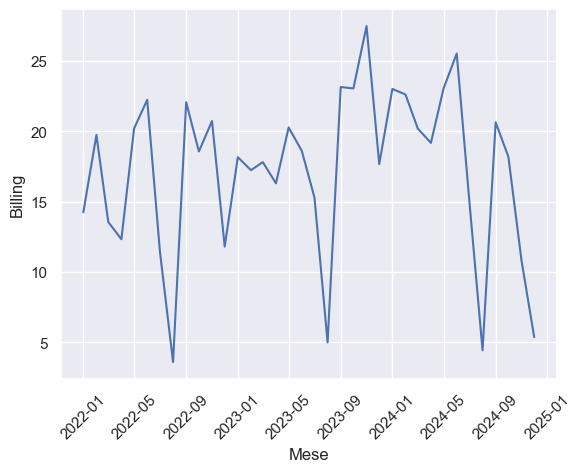

In [29]:
# Cost chart

sns.set()
plt.ylabel('Billing')
plt.xlabel('Mese')
plt.xticks(rotation = 45)

plt.plot(df.index,df['Billing'])

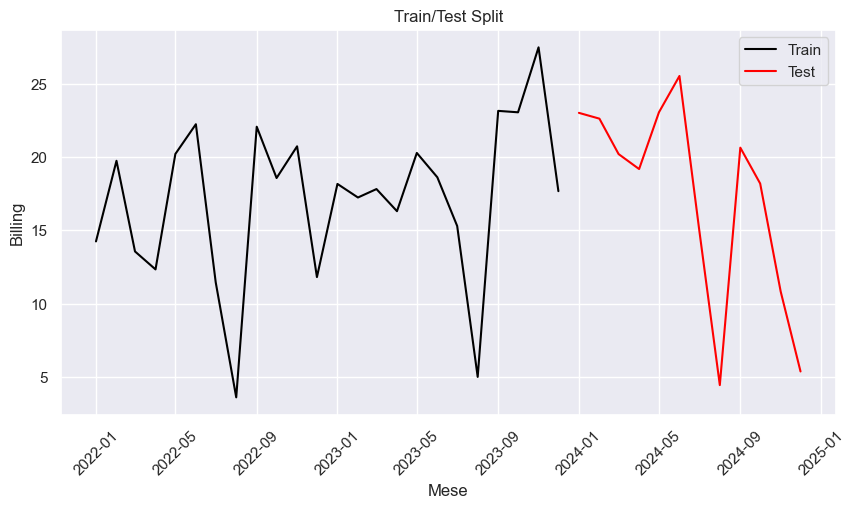

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Dividi i dati in set di addestramento e di test
train = df[df.index < pd.to_datetime("2024-01-01", format='%Y-%m-%d')]
test = df[df.index >= pd.to_datetime("2024-01-01", format='%Y-%m-%d')]

# Visualizza il grafico dei dati di addestramento e di test
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['Billing'], color="black", label="Train")
plt.plot(test.index, test['Billing'], color="red", label="Test")
plt.ylabel('Billing')
plt.xlabel('Mese')
plt.xticks(rotation=45)
plt.title("Train/Test Split")
plt.legend()
plt.show()



In [31]:
y = train['Billing']

# Auto regressive models
ARMAmodel = SARIMAX(y,order = (36,0,3)) #very imp
ARMAmodel = ARMAmodel.fit()


C:\Users\carbaren\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\carbaren\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\carbaren\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\carbaren\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

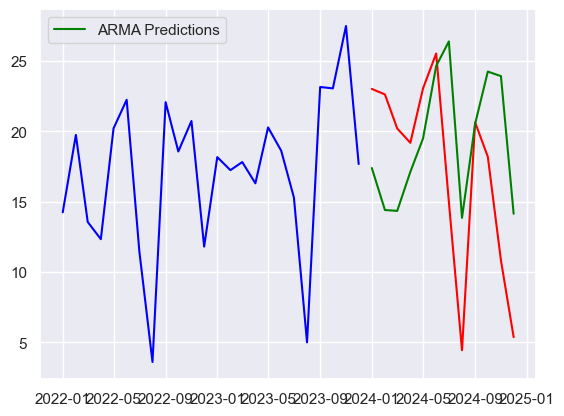

In [32]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(train,color = "blue")
plt.plot(test, color = "red")
plt.plot(y_pred_out, color='green', label = 'ARMA Predictions')
plt.legend()

In [33]:
y

Mese
2022-01-01   14.25
2022-02-01   19.75
2022-03-01   13.56
2022-04-01   12.34
2022-05-01   20.22
2022-06-01   22.25
2022-07-01   11.46
2022-08-01    3.60
2022-09-01   22.08
2022-10-01   18.58
2022-11-01   20.74
2022-12-01   11.81
2023-01-01   18.17
2023-02-01   17.25
2023-03-01   17.82
2023-04-01   16.31
2023-05-01   20.29
2023-06-01   18.63
2023-07-01   15.30
2023-08-01    5.00
2023-09-01   23.16
2023-10-01   23.06
2023-11-01   27.50
2023-12-01   17.68
Name: Billing, dtype: float64

In [34]:
y_pred_df

,lower Billing,upper Billing,Predictions
Mese,,,
2024-01-01,17.12,17.68,17.40
2024-02-01,14.13,14.70,14.41
2024-03-01,14.03,14.67,14.35
2024-04-01,16.80,17.45,17.13
2024-05-01,19.11,19.89,19.50
2024-06-01,24.23,25.08,24.65
2024-07-01,25.94,26.87,26.40
2024-08-01,13.39,14.32,13.86
2024-09-01,19.83,21.26,20.54


In [35]:
arma_rmse = np.sqrt(mean_squared_error(test['Billing'].values, y_pred_df["Predictions"].values))
print("RMSE: ", arma_rmse)

RMSE:  7.391172161578033


In [36]:
test.head()

,Billing
Mese,
2024-01-01,23.03
2024-02-01,22.63
2024-03-01,20.21
2024-04-01,19.19
2024-05-01,23.07


In [37]:
train

,Billing
Mese,
2022-01-01,14.25
2022-02-01,19.75
2022-03-01,13.56
2022-04-01,12.34
2022-05-01,20.22
2022-06-01,22.25
2022-07-01,11.46
2022-08-01,3.60
2022-09-01,22.08


### 2nd Model

In [38]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\carbaren\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\carbaren\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\carbaren\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\carbaren\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\

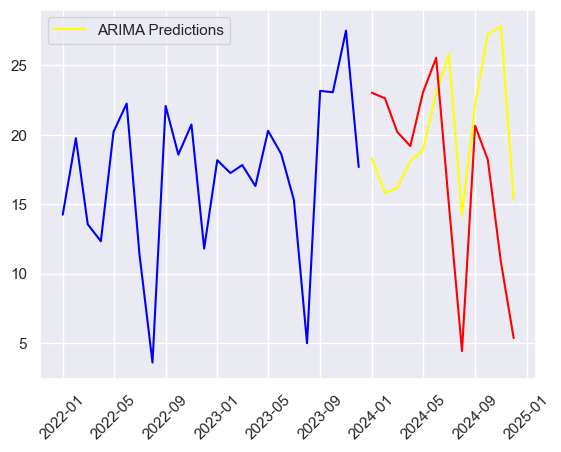

In [39]:
ARIMAmodel = ARIMA(y, order = (36,1,3)) #factors for corelation, number of times raw observations are different and shock factor,moving average window
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.plot(test, color = "red")
plt.plot(train,color = "blue")
plt.xticks(rotation=45)
plt.legend()

In [40]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["Billing"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  8.130043177891567


In [41]:
y_pred_df

,lower Billing,upper Billing,Predictions
Mese,,,
2024-01-01,17.90,18.71,18.31
2024-02-01,15.40,16.22,15.81
2024-03-01,15.66,16.63,16.15
2024-04-01,17.60,18.65,18.12
2024-05-01,18.24,19.56,18.90
2024-06-01,22.30,23.82,23.06
2024-07-01,24.97,26.60,25.78
2024-08-01,13.40,15.02,14.21
2024-09-01,21.09,23.29,22.19


###  3rd Model - SARIMAX

C:\Users\carbaren\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\carbaren\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\carbaren\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\carbaren\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizati

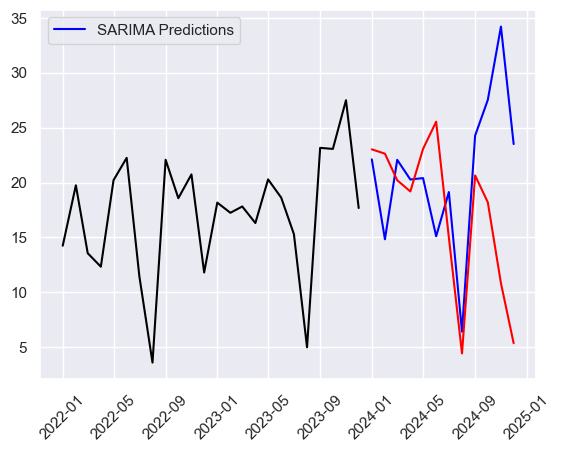

In [42]:
SARIMAXmodel = SARIMAX(y, order = (1,1,1), seasonal_order=(1,1,1,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.plot(test, color = "red")
plt.plot(train,color = "black")
plt.xticks(rotation=45)
plt.legend()



In [43]:
y_pred_df

,lower Billing,upper Billing,Predictions
Mese,,,
2024-01-01,20.92,23.31,22.11
2024-02-01,13.64,16.03,14.83
2024-03-01,20.88,23.26,22.07
2024-04-01,19.09,21.47,20.28
2024-05-01,19.21,21.60,20.41
2024-06-01,13.92,16.30,15.11
2024-07-01,17.94,20.33,19.14
2024-08-01,5.23,7.62,6.42
2024-09-01,23.08,25.47,24.28


In [44]:
sarima_rmse = np.sqrt(mean_squared_error(test["Billing"].values, y_pred_df["Predictions"]))
print("RMSE: ",sarima_rmse)

RMSE:  9.912107287321982


In [47]:
test_month = pd.read_csv("V:\Forecasting PMX\Dati\Test Month.csv") 


In [49]:
test_month.index = pd.to_datetime(test_month['Mese'], format="%d/%m/%Y")

In [51]:
del test_month['Mese']

In [52]:
test_month

""
Mese
2025-01-01
2025-02-01
2025-03-01
2025-04-01
2025-05-01
2025-06-01
2025-07-01
2025-08-01
2025-09-01


In [53]:
print(test_month.index)


DatetimeIndex(['2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01',
               '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01',
               '2025-09-01', '2025-10-01', '2025-11-01', '2025-12-01'],
              dtype='datetime64[ns]', name='Mese', freq=None)


In [54]:
print(test_month.index[0], test_month.index[-1])
print(SARIMAXmodel.data.row_labels)


2025-01-01 00:00:00 2025-12-01 00:00:00
DatetimeIndex(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Mese', freq=None)


In [55]:
#Arima
#pred= ARIMAmodel.predict(start = test_month.index[0], end = test_month.index[-1])

#Sarima
#pred= SARIMAXmodel.predict(start = test_month.index[0], end = test_month.index[-1])

#ARMA
pred = ARMAmodel.predict(start = test_month.index[0], end = test_month.index[-1])



In [56]:
test_month['Predictions'] = pred

In [57]:
test_month['Cliente'] = "STELLANTIS"

In [58]:
test_month

,Predictions,Cliente
Mese,,
2025-01-01,12.32,STELLANTIS
2025-02-01,22.32,STELLANTIS
2025-03-01,20.98,STELLANTIS
2025-04-01,26.45,STELLANTIS
2025-05-01,24.17,STELLANTIS
2025-06-01,29.60,STELLANTIS
2025-07-01,24.34,STELLANTIS
2025-08-01,9.29,STELLANTIS
2025-09-01,11.48,STELLANTIS


In [59]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Carica i dati
data = df

# Esegui il test di Dickey-Fuller
result = adfuller(data)

# Stampare i risultati
print('Test Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

Test Statistic: -1.9359279150373794
p-value: 0.31535274377709777
Critical Values: {'1%': -3.6996079738860943, '5%': -2.9764303469999494, '10%': -2.627601001371742}


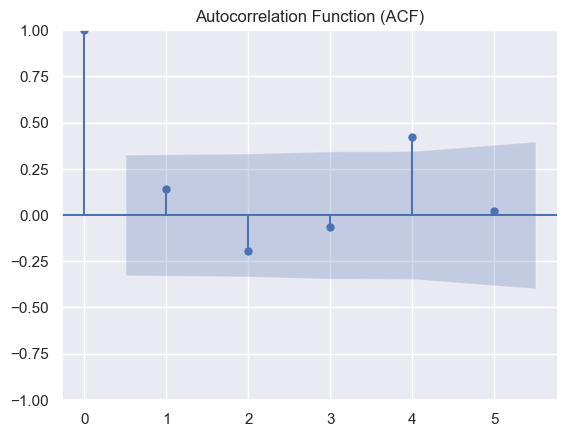

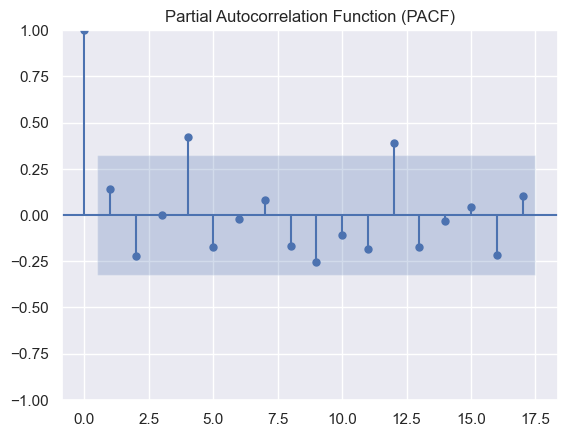

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# Carica i dati
data = df

# Plot ACF
plot_acf(data, lags=5)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Calcola il numero massimo di ritardi consentiti
max_lags = int(np.floor(data.shape[0] / 2))

max_lags =min(max_lags, data.shape[0] // 2 - 1)

# Plot PACF con lags <= max_lags
plot_pacf(data, lags=max_lags)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [61]:
#change conc Name
test_month.to_csv(r"V:\ShareToBrand\Forecasting PMX\Dati\RegressioneConc_test.csv", index=False)


OSError: Cannot save file into a non-existent directory: 'V:\ShareToBrand\Forecasting PMX\Dati'